# Computer Project #2

A cylindrical fuel rod of radius $R$ is cooled by fluid around it, with heat transfer coefficient $h$. Consider the rod to be infinite in the $z$ direction. The bulk coolant temperature is $T_{b0}$. The fuel element is made of UO2 ($R=0.5$ cm). Density = 10.75 g/cm^3, k = 2 W/(m-K), Cp = 84 J/(mol-K).

## ANALYTICAL SOLUTION

(a) Find the steady-staate temperature distribution for $t<0$, $T_{i}(r)$, in the fuel rod due to ta sparially uniform heat generation term of $\dot{q}_{0}$ (W/cm^3). What value of $\dot{q}_{0}$ (in kW/m^3) will lead to the maximum temperature in the fuel rod to be 700 C?  

Use the value of $\dot{q}_{0}$ in the rest of this project. Plot temperature of the radial coodinate.

(answer)  
From given problem statement, we first need to consider the steady state. The heat conduction equation at the steady state is described as
$$
\frac{1}{r}\frac{d}{dr}(r \frac{dT}{dr}) + \frac{\dot{q}_{0}}{k} = 0
$$
where boundary conditions:
$$
\text{BC1 (symmetry) : } T = finite \text{ at } r =0 
$$

$$
\text{BC2 (convection) : } -k \frac{dT}{dr}|_{r=R} = h(T(R)-T_{b0})
$$


Solve for $T(r)$:
$$
\begin{align*}
 \frac{1}{r}\frac{d}{dr}(r \frac{dT}{dr}) + \frac{\dot{q}_{0}}{k} &= 0\\ 
 \frac{1}{r}\frac{d}{dr}(r \frac{dT}{dr}) &= -  \frac{\dot{q}_{0}}{k}\\
 \frac{d}{dr}(r \frac{dT}{dr}) &= - \frac{\dot{q}_{0}r}{k}
\end{align*}
$$

Integrate both hand sides for $r$:

$$
\begin{align*}
 r \frac{dT}{dr} &= - \frac{\dot{q}_{0}r^2}{2k} + C_{1}\\
 \frac{dT}{dr} &= - \frac{\dot{q}_{0}r}{2k} + \frac{C_{1}}{r}
\end{align*}
$$

Integrate both hand sides again:

$$
    T(r) = - \frac{\dot{q}_{0}r^2}{4k} + C_{1}\ln{r} + C_{2}
$$

From the BC1, the coefficient $C_{1} = 0$. Hence,
$$
T(r) = - \frac{\dot{q}_{0}r^2}{4k} + C_{2}
$$

Apply the BC2, the $C_{2}$ is expressed as:
$$
C_{2} = \frac{\dot{q}_{0}R}{2h} + \frac{\dot{q}_{0}R^2}{4k} + T_{b0}
$$

Therefore, $T(r)$ is

$$
T(r) = -\frac{\dot{q}_{0}r^2}{4k} +  \frac{\dot{q}_{0}R}{2h} + \frac{\dot{q}_{0}R^2}{4k} + T_{b0}
$$

Since the geometry is a cylindrical and the heat generation is uniform, the centerline ($r=0$) goes to the maximum temperature.  
Substitute $r=0$ and $T(r=0)=700$ C for finding $\dot{q}_{0}$:

$$
(-\frac{R}{2h} + \frac{R^2}{4k})\dot{q}_{0} = T(r=0) - T_{b0} (=400)
$$

Solve for $\dot{q}_{0}$:
$$
\dot{q}_{0} = 125764.2 \text{  ($\rm kW/m^3$) }
$$

The following cells show the plot of the temperature distribution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
''' 
define given parameters
'''
R = 0.005 # radius of fuel [cm]
rho = 10750 # density of fuel [kg/m^3]
k = 2 # thermal conductivity of fuel [W/m-K]
cp = 84 * 1/270.03 # specific heat of fuel [J/g-K]

h = 45000 # [W/m^2-K]
Tb0 = 300 # [K]
q0 = 125764.2 * 1000  # [kW/m^3]

tau, m = 0.02, 0.02

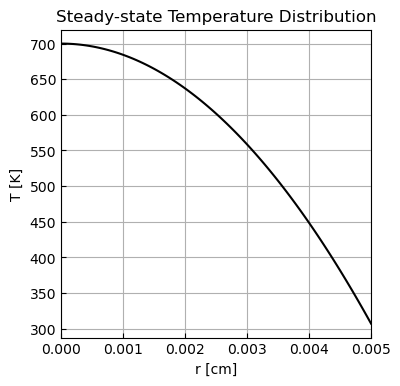

In [3]:
# T(r) = -\frac{\dot{q}_{0}r^2}{4k} +  \frac{\dot{q}_{0}R}{2h} + \frac{\dot{q}_{0}R^2}{4k} + T_{b0}
def T(r):
    return -q0 * r**2 / (4*k) + q0 * R / (2*h) + q0 * R**2 / (4*k) + Tb0

# plot T(r) vs r
r = np.linspace(0, R, 100)
fig, ax = plt.subplots(1,1, figsize=(4,4))
ax.plot(r, T(r), 'k-')
ax.set_xlabel('r [cm]')
ax.set_ylabel('T [K]')
ax.set_title('Steady-state Temperature Distribution')
ax.grid(True)
ax.set_xlim(0, R)
plt.show()

(b) Assuming $h$ remains constant, the heat generation rate and the bulk coolant temperature start to change at $t=0$ with time as $\dot{q}(t)$ and $T_{b}(t)$. For $t>0$, find the anauytical expression for the temperature distribution in the fuel rod $T(r,t)$. Use the temperature distribution found in part (a) as your initial condition at $t=0$.

(answer)

Consider the heat conduction equation:
$$
$$

A cylindrical fuel rod of radius R is cooled by fluid around it, with heat transfer coefficient h. Consider
the rod to be infinite in the z direction. The bulk coolant temperature is Tb0. The fuel element is made
of UO2 (R = 0.5 cm). [Density = 10.75 g/cm3; k = 2 W/(m‐K); Cp = 84 J/(mol‐K)]. Pay attention to the
units.

$$
\dot{q}(t) = \frac{\dot{q}_{0}}{2}(1 + e^{- \eta t})
$$

$$
\dot{T}_{b}(t) = \frac{T_{b0}}{2}(1 + e^{- m t})
$$

## B. NUMERICAL SOLUTION

Now, solve the problem numerically using a finite difference scheme (central difference for space, and explicit
in time). Show your work and include your computer code in an Appendix.

### (a) For the numerical solution obtained using an explicit finite difference method (for m = η = 0.02)

(i) Carry out a systematic study of the effects of the grid size and the time step on the accuracy of the solution. Devise a strategy to convince the reader that the number of grid points you are using is adequate but not an overkill. Implement the strategy and report your results. [Carry out a mesh refinement study to determine an adequate grid size.]

(ii) Also, convince the reader that the time step you used for each solution is small enough but not
unnecessarily small. [Carry out a time step refinement study to determine adequate time steps for
each simulation.]

(iii) Plot the converged analytical and numerical solutions for each ti and compare them.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
''' 
define given parameters
'''
r = 0.5 # radius of fuel [cm]
rho = 10.75 # density of fuel [kg/m^3]
k = 2 # thermal conductivity of fuel [W/m-K]
cp = 84 * 1/270.03 # specific heat of fuel [J/g-K]

# heat generation rate [W/cm^3]
def q(q0, tau, t):
    return q0 * 1/2 * (1 + np.exp(-tau * t))

# bulk temperature [k]
def Tb(Tb0, m, t):
    return Tb0 * (1 + np.exp(-m * t)) * 1/2

h = 4.5 # [W/m^2-K]
Tb0 = 300 + 273 # [K]
q0 = 125.76 # [W/cm^3] -> 125764.2 [kW/m^3]

tau, m = 0.02, 0.02

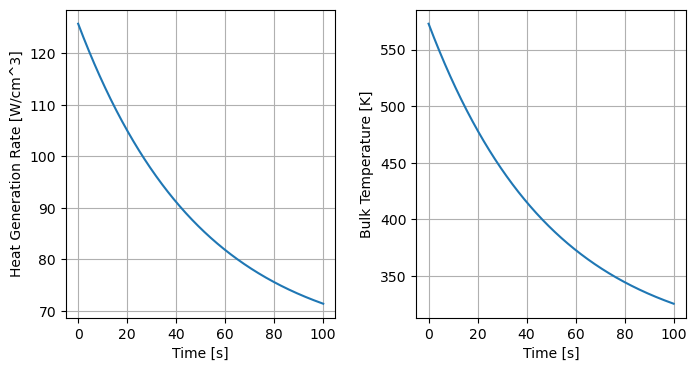

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

t = np.linspace(0, 100, 1000)
ax[0].plot(t, q(q0, tau, t))
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Heat Generation Rate [W/cm^3]')
ax[0].grid(True)
ax[1].plot(t, Tb(Tb0, m, t))
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Bulk Temperature [K]')
ax[1].grid(True)

In [4]:
# Now, solve the problem numerically using a finite difference scheme (central difference for space, and explicit in time).
# We want to study the characteristics of the numerical solution (grid independence, convergence, etc).
# For the numerical solution obtained using an explicit finite difference method (for m = η = 0.02)
# Carry out a systematic study of the effects of the grid size and the time step on the accuracy of the solution. Devise a strategy to convince the reader that the number of grid points you are using is adequate but not an overkill. Implement the strategy and report your results. [Carry out a mesh refinement study to determine an adequate grid size.]

Nr=20: RMSE=69.28916953889379, MAE=69.27265863775324, dr=0.0250, dt=0.0000
Nr=40: RMSE=31.9195664774009, MAE=31.90985110343266, dr=0.0125, dt=0.0000
Nr=80: RMSE=15.3357230155843, MAE=15.330290488253734, dr=0.0063, dt=0.0000


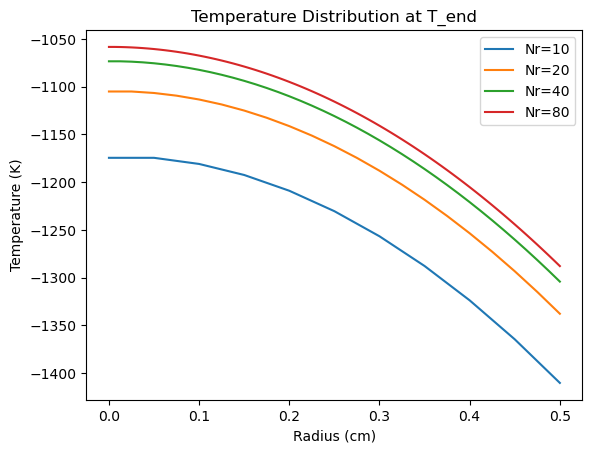

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

eta, m = 0.02, 0.02  # parameters
initial_cylinder_temp = 700 + 273  # initial cylinder temp obtained from analytical solution (Part A (a))

# Heat generation rate function
def q(t):
    return q0 * 0.5 * (1 + np.exp(-eta * t))

# Bulk temperature function
def Tb(t):
    return Tb0 * 0.5 * (1 + np.exp(-m * t))

# Finite difference solution
def solve_heat_equation(Nr, Nt, T_end):
    dr = r / Nr
    dt = T_end / Nt
    r_values = np.linspace(0, r, Nr + 1)
    t_values = np.linspace(0, T_end, Nt + 1)

    T = np.full((Nr + 1, Nt + 1), initial_cylinder_temp, dtype=np.float64)

    for n in range(0, Nt):
        for i in range(1, Nr):
            T[i, n + 1] = T[i, n] + dt * (
                k / (rho * cp) * ((T[i + 1, n] - 2 * T[i, n] + T[i - 1, n]) / dr**2 + 1 / r_values[i] * (T[i + 1, n] - T[i - 1, n]) / (2 * dr)) + 
                q(t_values[n]) / (rho * cp)
            )

        T[0, n + 1] = T[1, n + 1]
        T[Nr, n + 1] = T[Nr - 1, n + 1] + dr * h / k * (Tb(t_values[n + 1]) - T[Nr, n + 1])

    return r_values, t_values, T, dr, dt

# Error metric functions
def rmse(T1, r1, T2, r2):
    interpolate_T1 = interp1d(r1, T1, kind='linear', fill_value="extrapolate")
    T1_interpolated = interpolate_T1(r2)
    return np.sqrt(np.mean((T1_interpolated - T2) ** 2))

def mae(T1, r1, T2, r2):
    interpolate_T1 = interp1d(r1, T1, kind='linear', fill_value="extrapolate")
    T1_interpolated = interpolate_T1(r2)
    return np.mean(np.abs(T1_interpolated - T2))

# Mesh refinement study with error metrics
def mesh_refinement_study(Nr_values=None, Nt=5000, T_end=1):
    ''' 
    Nr_values : Different grid sizes
    Nt = 5000 (default): Number of time steps
    T_end = 1 (default): End time
    '''

    previous_T = None
    previous_r_values = None
    for Nr in Nr_values:
        r_values, t_values, T, dr, dt = solve_heat_equation(Nr, Nt, T_end)
        plt.plot(r_values, T[:, -1], label=f'Nr={Nr}')

        if previous_T is not None:
            diff_rmse = rmse(previous_T[:, -1], previous_r_values, T[:, -1], r_values)
            diff_mae = mae(previous_T[:, -1], previous_r_values, T[:, -1], r_values)
            print(f'Nr={Nr}: RMSE={diff_rmse}, MAE={diff_mae}, dr={dr:.4f}, dt={dt:.4f}')

        previous_T = T
        previous_r_values = r_values

    plt.xlabel('Radius (cm)')
    plt.ylabel('Temperature (K)')
    #plt.ylim(0, 500)
    plt.title('Temperature Distribution at T_end')
    plt.legend()
    plt.show()


''' 
If an overflow happened, it means that the grid size is too small. Hence, the last grid size before the overflow is the minimum grid size.

(Example)
When Nt = 5000, T_end = 1, limit = 0.01
Nr = 330 causes an overflow, therefore Nr = 320 is the minimum grid size.
'''

mesh_refinement_study(Nr_values = [10, 20, 40, 80], Nt=50000, T_end=1)



/var/folders/m2/q04dcnhs4yj_6ml80j57mmk80000gp/T/ipykernel_83876/3026080914.py:28: RuntimeWarning: overflow encountered in double_scalars
  k / (rho * cp) * ((T[i + 1, n] - 2 * T[i, n] + T[i - 1, n]) / dr**2 + 1 / r_values[i] * (T[i + 1, n] - T[i - 1, n]) / (2 * dr)) +
/var/folders/m2/q04dcnhs4yj_6ml80j57mmk80000gp/T/ipykernel_83876/3026080914.py:27: RuntimeWarning: invalid value encountered in double_scalars
  T[i, n + 1] = T[i, n] + dt * (
/var/folders/m2/q04dcnhs4yj_6ml80j57mmk80000gp/T/ipykernel_83876/3026080914.py:28: RuntimeWarning: invalid value encountered in double_scalars
  k / (rho * cp) * ((T[i + 1, n] - 2 * T[i, n] + T[i - 1, n]) / dr**2 + 1 / r_values[i] * (T[i + 1, n] - T[i - 1, n]) / (2 * dr)) +


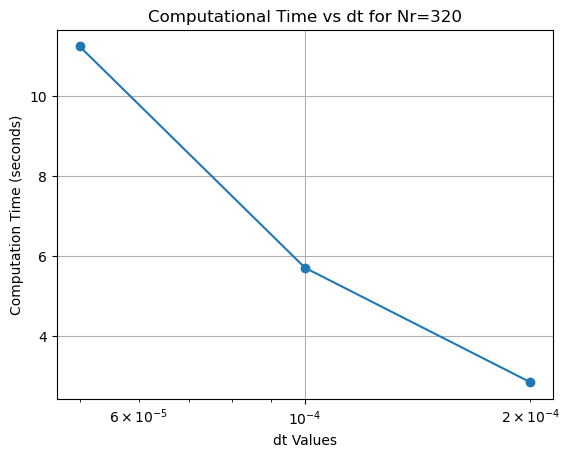

In [6]:
import time

# Updated function to study the effect of dt with computation time
def study_dt_effect(Nr_fixed, dt_values, T_end):
    '''
    Nr_fixed: Fixed number of radial divisions
    dt_values: Different time step sizes to investigate
    T_end: End time of the simulation
    '''

    computation_times = []  # To store computation times for each dt

    for dt in dt_values:
        Nt = int(T_end / dt)  # Calculate the number of time steps based on dt

        # Measure computation time
        start_time = time.time()
        _, _, _, _, _ = solve_heat_equation(Nr_fixed, Nt, T_end)
        end_time = time.time()
        computation_time = end_time - start_time
        computation_times.append(computation_time)

    # Plot dt_values vs computational time
    plt.plot(dt_values, computation_times, marker='o', linestyle='-')
    plt.xlabel('dt Values')
    plt.ylabel('Computation Time (seconds)')
    plt.xscale('log')
    plt.title(f'Computational Time vs dt for Nr={Nr_fixed}')
    plt.grid(True)
    plt.show()

# Example usage
Nr_fixed = 320
dt_values = [0.0002, 0.0001, 0.00005]  # Specify the dt values you want to investigate
study_dt_effect(Nr_fixed, dt_values, T_end=1)


In [7]:
import numpy as np
from scipy.optimize import fsolve

# Given parameters
k = 0.02  # W/cm-K (thermal conductivity)
R = 0.5  # cm (radius of the rod)
h = 45 * 100  # W/cm^2-K (heat transfer coefficient, converted from kW/m^2-K)
Tb0 = 300 + 273.15  # K (bulk temperature, converted from °C)
T_max = 700 + 273.15  # K (maximum temperature, converted from °C)

# Function to calculate temperature at the center based on q0
def center_temperature(q0):
    # Solving the differential equation T(r) = -q0/(4*k)*r^2 + C2
    # Apply boundary condition at r = R: -k*dT/dr = h*(T(R) - Tb0)
    C2 = q0 * R**2 / (4 * k) + h * (q0 * R**2 / (4 * k * h) + Tb0) / (h + k/R)
    
    # Temperature at the center
    return -q0 * R**2 / (4 * k) + C2

# Function to find q0 such that the center temperature is T_max
def find_q0(T_max):
    # Function to find the root of
    def func(q0):
        return center_temperature(q0) - T_max
    
    # Initial guess for q0
    initial_guess = 1  # W/cm^3
    q0_solution, = fsolve(func, initial_guess)
    return q0_solution

# Calculate q0
q0_required = find_q0(T_max)

# Output the result
print("Required heat generation rate q0 (in W/cm^3):", q0_required)


Required heat generation rate q0 (in W/cm^3): 576012.4563203197


/Users/kk55f/mambaforge3/envs/torch-gpu/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
